In [18]:
import pandas as pd
data = pd.read_csv('/kaggle/input/titanic/train.csv')


In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
num_rows, num_cols = data.shape
print('Number of Rows:', num_rows)
print('Number of Columns:', num_cols)

Number of Rows: 891
Number of Columns: 12


In [21]:
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [22]:
from sklearn.impute import SimpleImputer

# Impute 'Age' with the mean
age_imputer = SimpleImputer(strategy='mean')
data['Age'] = age_imputer.fit_transform(data[['Age']]).ravel()

# Impute 'Cabin' with the most frequent
cabin_imputer = SimpleImputer(strategy='most_frequent')
data['Cabin'] = cabin_imputer.fit_transform(data[['Cabin']]).ravel()

# Impute 'Embarked' with the most frequent
embarked_imputer = SimpleImputer(strategy='most_frequent')
data['Embarked'] = embarked_imputer.fit_transform(data[['Embarked']]).ravel()

# Check missing values
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [23]:
# 5. What is the distribution of passenger classes?
passenger_class = data['Pclass'].value_counts()
print("Passenger class distribution:")
print(passenger_class)

Passenger class distribution:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [24]:
embarked_counts = data['Embarked'].value_counts()
print("Passengers embarked from each port:")
print(embarked_counts)

Passengers embarked from each port:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [25]:
survived_count = data['Survived'].sum()

print("Number of passengers who survived:", survived_count)

Number of passengers who survived: 342


In [26]:
survival_rate = data['Survived'].mean() * 100
print("Survival rate: {:.2f}%".format(survival_rate))

Survival rate: 38.38%


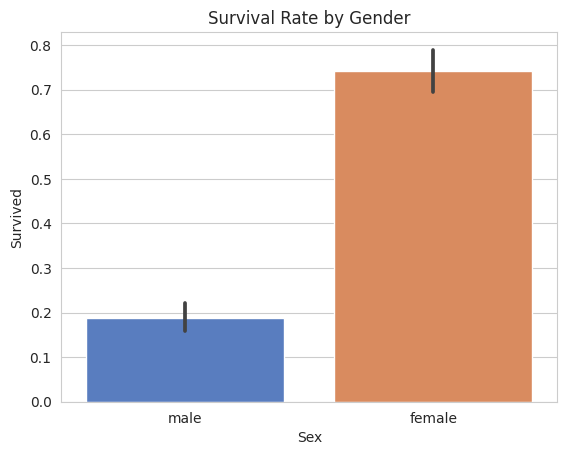

In [27]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plotting survival rate by gender
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Survival Rate by Gender")
plt.show()

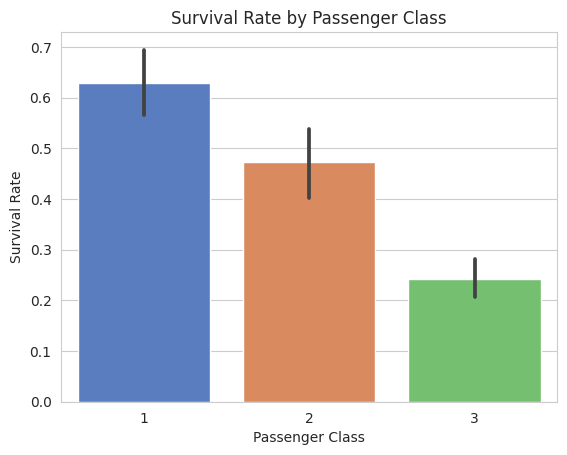

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in 'Pclass' or 'Survived'
clean_data = data.dropna(subset=['Pclass', 'Survived'])

# Plot
sns.barplot(x='Pclass', y='Survived', data=clean_data)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

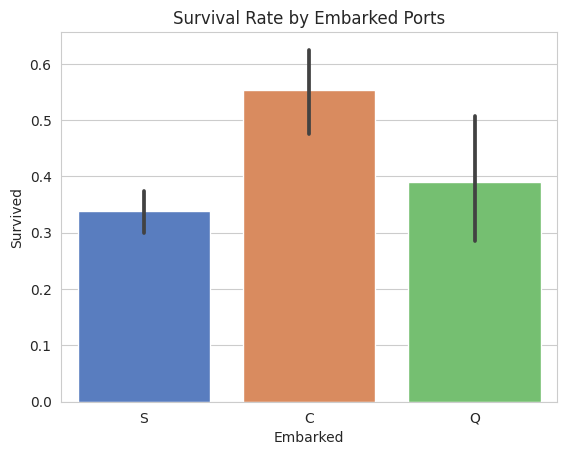

In [29]:
# 3. Plotting survival rate by embarked port
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title("Survival Rate by Embarked Ports")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


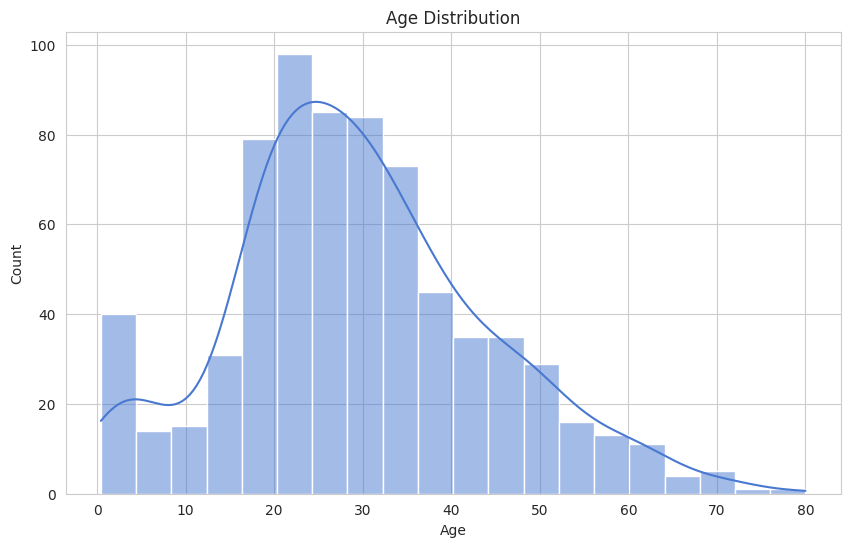

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (if not already loaded)
data = pd.read_csv("/kaggle/input/titanic/train.csv")

# Optional styling to match video
sns.set_style("whitegrid")              # Set theme
plt.figure(figsize=(10, 6))             # Set figure size

# Plot Age Distribution
sns.histplot(data['Age'].dropna(), bins=20, kde=True)

# Titles and labels
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<function matplotlib.pyplot.show(close=None, block=None)>

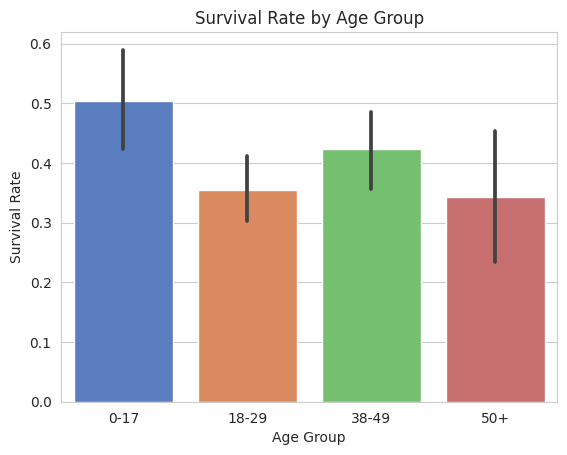

In [31]:
# Creating age groups 
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 18, 30, 50, data['Age'].max()], labels=['0-17','18-29','38-49', '50+'])

# Plotting the survival rate by age group 
sns.barplot(x='AgeGroup', y='Survived', data=data)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show

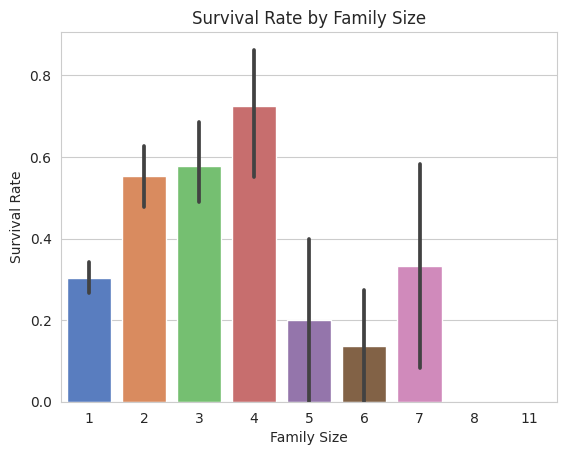

In [32]:
# Calculate total family size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Plot
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()